### Part 1. Solve the condition where the maximum improvement benefit > 0



#### 1.1 Numerical Solution to find the condition where the maximum of first order derivative is larger than 0

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
from scipy.optimize import fsolve
func = lambda tau: (tau+2)/(tau*np.exp(2*tau+2)) - 1
root = fsolve(func,1)

In [3]:
# sanity check
func(root)
print(root[0])
print('clnR should be within 0 and', root[0]**2+2*root[0])
threshold_1 = root[0]**2+2*root[0]

0.19967864025773374
clnR should be within 0 and 0.43922883989064493


#### 1.2 Under above condition, calculate the condition where maximum of utility larger than 0

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

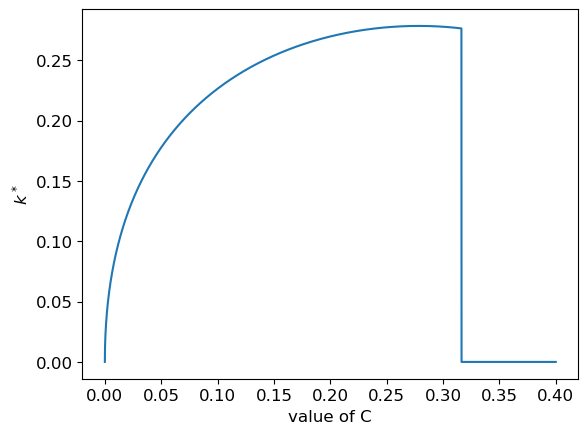

In [4]:
A_values = np.linspace(0,0.4,10000)
max_dict = dict()
max_dict['-clnR'] = A_values
x_values = []
y_values = []
for A in A_values:
  func = lambda tau: -np.exp(-A/tau) + np.exp(tau) - 1
  res = scipy.optimize.minimize_scalar(func, bounds= [-1e-5,1], method='bounded')
  max_y = -func(res.x)
  if max_y > 0:
    x_values.append(res.x)
  else:
    x_values.append(0)
    max_y = 0
  y_values.append(max_y)
max_dict['x_values'] = x_values
max_dict['y_values'] = y_values

plt.plot(max_dict['-clnR'], max_dict['x_values'])
plt.xlabel('value of C', fontsize = 12)
plt.ylabel(r'$k^*$', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.savefig('kstar.eps')

In [13]:
import pandas as pd
df = pd.DataFrame(max_dict)
print(df[df['y_values'] == 0].iloc[0])
threshold_2 = df[df['y_values'] == 0].iloc[0]['-clnR']

-clnR       0.316352
x_values    0.000000
y_values    0.000000
Name: 7908, dtype: float64


#### Demonstration of utility curve under different configurations

In [11]:
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(
                                  #  weight='bold',
                                   style='normal', size=15)

(array([-1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

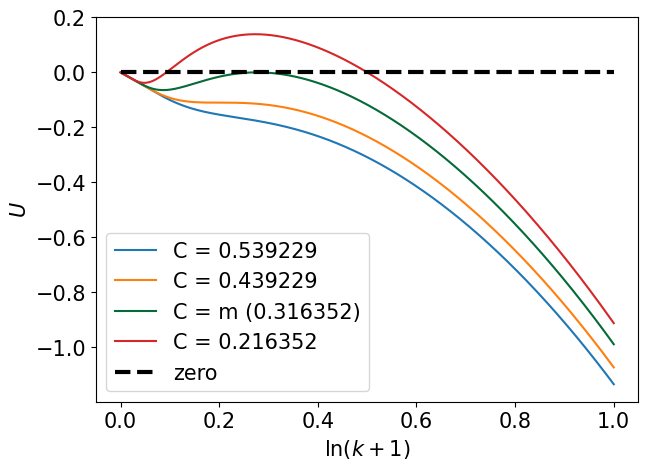

In [14]:
tau = np.linspace(0,1,1000)
plt.figure(figsize = (7,5))
# above threshold_1
t = threshold_1 + 0.1
func = lambda tau: -np.exp(-t/tau) + np.exp(tau) - 1
plt.plot(tau, -func(tau), label = "C = %f" %t, color = '#1f77b4')

# at threshold_1
func = lambda tau: -np.exp(-threshold_1/tau) + np.exp(tau) - 1
plt.plot(tau, -func(tau),label = "C = %f" %threshold_1, color = '#ff7f0e')

# at threshold_2
func = lambda tau: -np.exp(-threshold_2/tau) + np.exp(tau) - 1
plt.plot(tau,-func(tau),label = "C = m (%f)" %threshold_2, color = '#046a38')

# under threshold_2
t = threshold_2 - 0.1
func = lambda tau: -np.exp(-t/tau) + np.exp(tau) - 1
plt.plot(tau,-func(tau), label = "C = %f" %t, color = '#d62728')
plt.plot(tau, [0]*len(tau),'--', linewidth = 3, label = 'zero', color = 'k')
plt.xlabel(r'$\ln(k+1)}$', size = 15)
plt.ylabel(r'$U$', size = 15)
plt.legend(loc = 3, prop = font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig('Utility-under-different-C.eps')

### Part 2: Demonstrate Corollary 1, when $r$ and $ϵ$ are fixed, how high does the initial qualification need to be in order to improve successfully

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

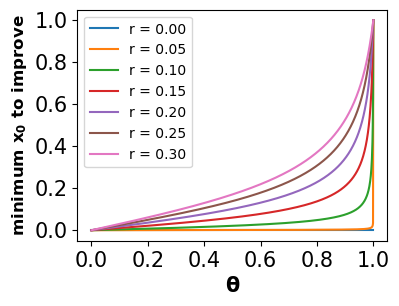

In [66]:
plt.figure(figsize = (4,3))
for r in np.linspace(0,0.3,7):
  func = lambda theta: (1 + (1/theta**2-1) * np.exp(2*threshold_2/np.log(1+r)))**(-0.5)
  theta = np.linspace(0, 1, 1000)
  y = func(theta)
  plt.plot(theta,y,label = "r = %.2f" % r)
  plt.xlabel(r'$\mathbf{\theta}$',size = 15)
  plt.ylabel(r'$\mathbf{minimum ~ x_0 ~to ~ improve}$', size = 12)

plt.legend(loc = 2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig('initial.eps')

#### Also, we can show the best score we could achieve if we want all individuals above initial score $x_0$ are able to improve

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


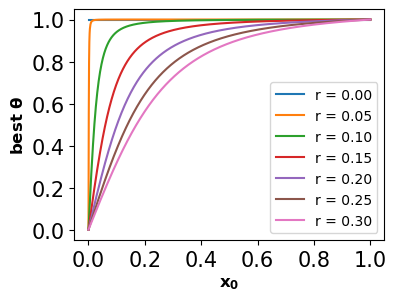

In [13]:
plt.figure(figsize = (4,3))
for r in np.linspace(0,0.3,7):
  func = lambda x0: (1 + (x0**(-2)-1)*np.exp(-2*threshold_2/np.log(1+r)))**(-0.5)
  x0 = np.linspace(0,1,1000)
  theta = func(x0)
  plt.plot(x0,theta,label = "r = %.2f" % r)
  plt.xlabel(r'$\mathbf{x_0}$', size=12)
  plt.ylabel(r'$\mathbf{best~\theta}$', size = 12)

plt.legend(loc = 4)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('best score.eps')

#### Part 3 Manipulation vs Improvement 

Assume the Manipulation cost = distance cost

But there is a probability p that manipulation is still discovered

It should be obvious for every configuration there exists a p to make individuals never manipulate

In [23]:
font = font_manager.FontProperties(
                                  #  weight='bold',
                                   style='normal', size=13)
def draw_net_benefit(theta, r, Prob):
  # All configurations already ensure maximum improvement benefit is larger than 0
  print('under this setting, the desired score is %f' %theta)
  x = np.linspace(0,theta,1000)
  A = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))*np.log(1+r)
  T = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))/np.log(2)
  plt.figure(figsize = (8,7))
  for p in Prob:
    y1 = (1-p) * 1/(1+r)**T - (theta - x)
    y2 = np.zeros(1000)
    i = 0
    for A_value in A:
      func = lambda tau: -np.exp(-A_value/tau) + np.exp(tau) - 1
      res = scipy.optimize.minimize_scalar(func, bounds= [0,1], method='bounded')
      y2[i] = max(-func(res.x),0)
      i += 1
    plt.plot(x,y1-y2,label = "p = %.2f" %p)
    df = pd.DataFrame({'x0': x, 'net': y1-y2})
    if(len(df[df['net'] > 0]) == 0):
      print('the individual will never manipulate when p = %f' %p)
    else:
      left = df[df['net']>=0].iloc[0]['x0']
      right = df[df['net']>=0].iloc[-1]['x0']
      print('the length in which manipulation benefit is larger than improvement benefit when p = %f is: %f' %(p,right-left))
  plt.plot(x, [0]*len(x), '--', label = 'zero line', linewidth = 3, color = 'k')
  plt.xlabel(r'$x_0$', size = 15)
  plt.ylabel(r'$\widetilde{U} - U^*$', size = 15)
  plt.legend(loc = 8, prop = font)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.savefig('manipulation vs improvement.eps')


In [37]:
font = font_manager.FontProperties(
                                  #  weight='bold',
                                   style='normal', size=14)
def draw_max_separate(theta,r, p = 0):
  # All configurations already ensure maximum improvement benefit is larger than 0
  print('under this setting, the desired score is %f' %theta)
  x = np.linspace(0,theta,1000)
  A = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))*np.log(1+r)
  plt.figure(figsize = (8,5))
  y2 = np.zeros(1000)
  i = 0
  for A_value in A:
    func = lambda tau: -np.exp(-A_value/tau) + np.exp(tau) - 1
    res = scipy.optimize.minimize_scalar(func, bounds= [0,1], method='bounded')
    y2[i] = max(-func(res.x),0)
    i += 1
  plt.plot(x,y2,label = "maximum improvement benefit")
  plt.legend()
  x = np.linspace(0,theta,1000)
  T = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))/np.log(2)
  y1 = (1-p) * 1/(1+r)**T - (theta-x)
  plt.plot(x,y1,label = "manipulation benefit")
  plt.xlabel(r'initial score $x_0$', size = 13)
  plt.ylabel(r'benefit', size = 15)
  plt.legend(loc = 2, prop = font)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=15)
  plt.savefig('separate.eps')

under this setting, the desired score is 0.900000


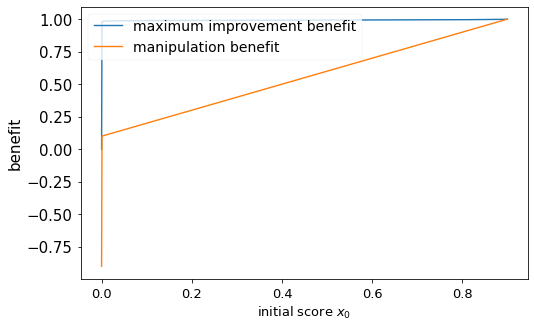

In [38]:
theta = 0.9
r = 0.00001
draw_max_separate(theta,r)

under this setting, the desired score is 0.995000
the length in which manipulation benefit is larger than improvement benefit when p = 0.100000 is: 0.436246
the length in which manipulation benefit is larger than improvement benefit when p = 0.200000 is: 0.330671
the length in which manipulation benefit is larger than improvement benefit when p = 0.300000 is: 0.209159


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


the individual will never manipulate when p = 0.400000
the individual will never manipulate when p = 0.500000


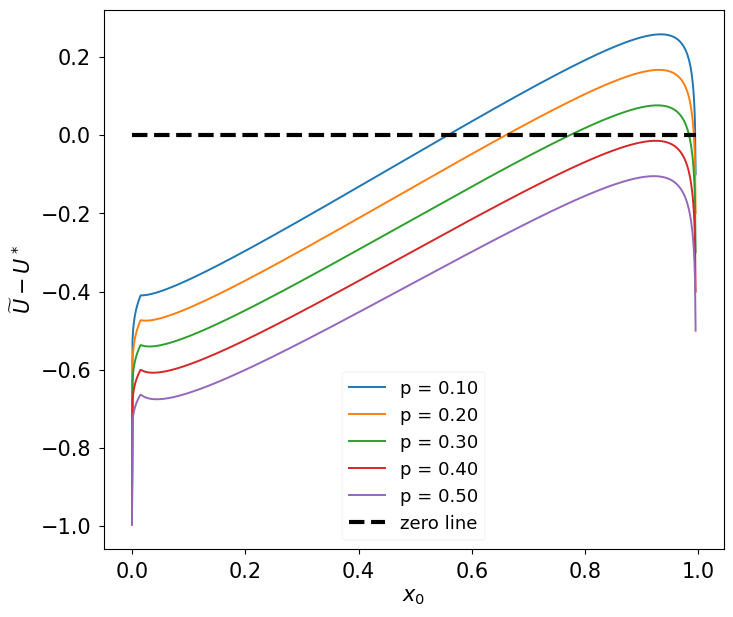

In [24]:
theta = 0.995
r = 0.05
Prob = [0.1,0.2,0.3,0.4,0.5]
draw_net_benefit(theta,r,Prob)

More comprehensively, we can illustrate the overall maximum utility the individual can get under specific configurations

In [ ]:
def draw_maximum_benefit(eps, r, Prob):
  # All configurations already ensure maximum improvement benefit is larger than 0
  print('under this setting, the desired score is %f' %np.sqrt(1/(1+eps)))
  x = np.linspace(0,np.sqrt(1/(1+eps)),1000)
  A = -np.log(np.sqrt(eps/(1/x**2-1)))*np.log(1+r)
  T = -np.log(np.sqrt(eps/(1/x**2-1)))/np.log(2)
  plt.figure(figsize = (10,6))
  for p in Prob:
    y1 = (1-p) * 1/(1+r)**T - (np.sqrt(1/(1+eps))-x)
    y2 = np.zeros(1000)
    i = 0
    for A_value in A:
      func = lambda tau: -np.exp(-A_value/tau) + np.exp(tau) - 1
      res = scipy.optimize.minimize_scalar(func, bounds= [0,1], method='bounded')
      y2[i] = -func(res.x)
      i += 1
    y1[y1<0] = 0
    y2[y2<0] = 0
    m = np.maximum.reduce([y1,y2])
    plt.plot(x,m,label = "p = %f" %p)
    df = pd.DataFrame({'x0': x, 'net': y1-y2, 'max': m})
    if(len(df[(df['net'] > 0) & (df['max'] > 0)]) == 0):
      print('the individual will never manipulate when p = %f' %p)
    else:
      left = df[(df['net']>0) & (df['max'] > 0)].iloc[0]['x0']
      right = df[(df['net']>0) & (df['max'] > 0)].iloc[-1]['x0']
      print('the score interval in which individuals will manipulate when p = %f is: %f to %f' %(p,left,right))

  plt.xlabel('initial score x0')
  plt.ylabel('maximum possible benefit')
  plt.legend()
  plt.title('maximum benefit when eps = %f and r = %f' %(eps, r))
  plt.savefig('maximum benefit.eps')


under this setting, the desired score is 0.995037
the score interval in which individuals will manipulate when p = 0.000000 is: 0.363552 to 0.995037
the score interval in which individuals will manipulate when p = 0.100000 is: 0.435267 to 0.994041
the score interval in which individuals will manipulate when p = 0.200000 is: 0.512957 to 0.993045
the score interval in which individuals will manipulate when p = 0.300000 is: 0.595628 to 0.991053
the score interval in which individuals will manipulate when p = 0.400000 is: 0.686267 to 0.984081
the score interval in which individuals will manipulate when p = 0.500000 is: 0.795831 to 0.966152


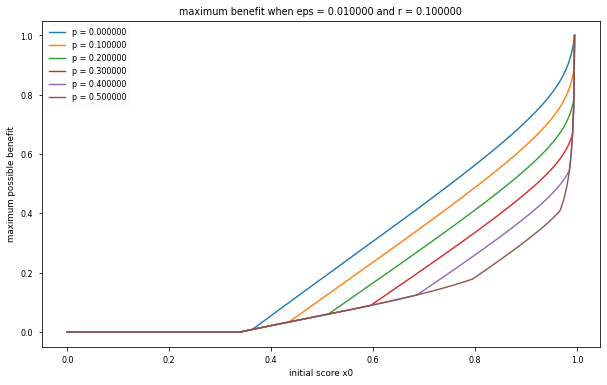

In [ ]:
eps = 0.01
r = 0.1
Prob = [0,0.1,0.2,0.3,0.4,0.5]
draw_maximum_benefit(eps,r,Prob)

under this setting, the desired score is 0.953463
the score interval in which individuals will manipulate when p = 0.000000 is: 0.773078 to 0.953463
the individual will never manipulate when p = 0.100000
the individual will never manipulate when p = 0.200000
the individual will never manipulate when p = 0.300000
the individual will never manipulate when p = 0.400000
the individual will never manipulate when p = 0.500000


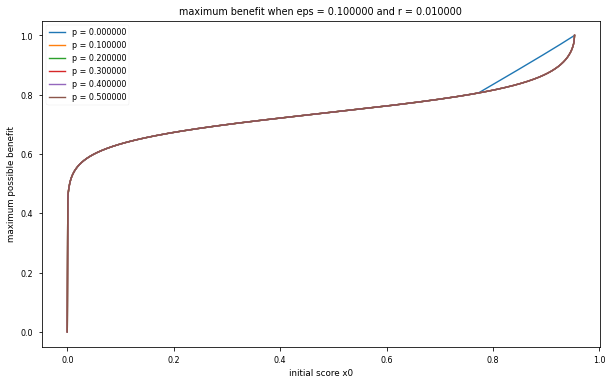

In [ ]:
eps = 0.1
r = 0.01
Prob = [0,0.1,0.2,0.3,0.4,0.5]
draw_maximum_benefit(eps,r,Prob)

under this setting, the desired score is 0.975900
the score interval in which individuals will manipulate when p = 0.000000 is: 0.499184 to 0.975900
the score interval in which individuals will manipulate when p = 0.100000 is: 0.612502 to 0.972969
the score interval in which individuals will manipulate when p = 0.200000 is: 0.740473 to 0.958316
the individual will never manipulate when p = 0.300000
the individual will never manipulate when p = 0.400000
the individual will never manipulate when p = 0.500000


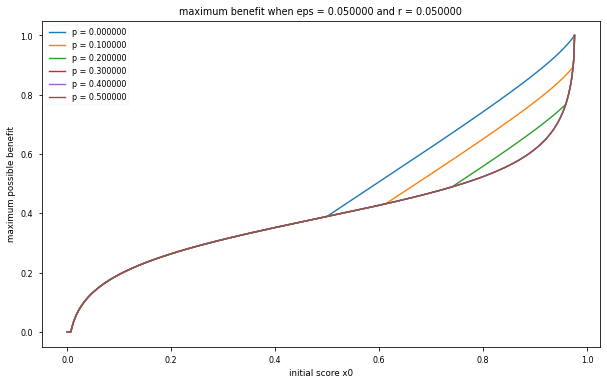

In [ ]:
eps = 0.05
r = 0.05
Prob = [0,0.1,0.2,0.3,0.4,0.5]
draw_maximum_benefit(eps,r,Prob)

#### We can get the minimum P to never let the manipulation behavior happen

In [16]:
def get_p(theta, r, Prob = np.linspace(0,1,100)):
  # All configurations already ensure maximum improvement benefit is larger than 0
  print('under this setting, the desired score is %f' %theta)
  x = np.linspace(0,theta,1000)
  A = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))*np.log(1+r)
  T = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))/np.log(2)
  for p in Prob:
    y1 = (1-p) * 1/(1+r)**T - (theta-x)
    y2 = np.zeros(1000)
    i = 0
    for A_value in A:
      func = lambda tau: -np.exp(-A_value/tau) + np.exp(tau) - 1
      res = scipy.optimize.minimize_scalar(func, bounds= [0,1], method='bounded')
      y2[i] = max(-func(res.x),0)
      i += 1
    y1[y1<0] = 0
    y2[y2<0] = 0
    m = np.maximum.reduce([y1,y2])
    df = pd.DataFrame({'x0': x, 'net': y1-y2, 'max': m})
    if(len(df[(df['net'] > 0) & (df['max'] > 0)]) == 0):
      print('To prevent manipulation, the minimum probability to be discovered when theta = %f and r = %f is %f' %(theta, r, p))
      return p

In [ ]:
r = np.linspace(0,1,10)
theta = 0.8
for rr in r:
  get_p(theta,rr)

under this setting, the desired score is 0.800000
To prevent manipulation, the minimum probability to be discovered when theta = 0.800000 and r = 0.000000 is 0.010101
under this setting, the desired score is 0.800000
To prevent manipulation, the minimum probability to be discovered when theta = 0.800000 and r = 0.111111 is 0.232323
under this setting, the desired score is 0.800000
To prevent manipulation, the minimum probability to be discovered when theta = 0.800000 and r = 0.222222 is 0.363636
under this setting, the desired score is 0.800000
To prevent manipulation, the minimum probability to be discovered when theta = 0.800000 and r = 0.333333 is 0.454545
under this setting, the desired score is 0.800000
To prevent manipulation, the minimum probability to be discovered when theta = 0.800000 and r = 0.444444 is 0.535354
under this setting, the desired score is 0.800000
To prevent manipulation, the minimum probability to be discovered when theta = 0.800000 and r = 0.555556 is 0.60606

In [ ]:
# Get a 3D plot of epislon and r
Theta = np.linspace(0.8,0.9999,10)
R = np.linspace(0,0.2,10)
theta, r = np.meshgrid(Theta,R)
myFn = np.vectorize(get_p, excluded=['Prob'])
p = myFn(theta,r)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


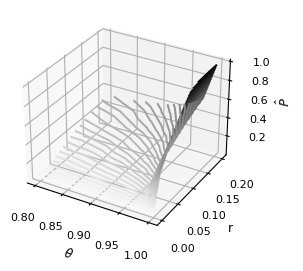

In [30]:
fig = plt.figure(figsize = (4,3))
ax = plt.axes(projection='3d')
ax.contour3D(Theta, R, p, 50, cmap='binary')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('r')
ax.set_zlabel(r'$\hat{P}$')
ax.set_xticks((0.8,0.85,0.9,0.95,1))
ax.set_yticks((0,0.05,0.1,0.15,0.2))
fig.savefig('probability.eps')

#### Decision Maker Benefit



In [7]:
import scipy.integrate as integrate
from scipy.stats import uniform, beta

In [32]:
# function to compute te decision-maker benefit
def compute_decision_benefit(r, theta, tp = 'uniform', a=0, b=0):
    # lower bound for improvement to begin
    if theta == 0 or theta == 1:
        xstar = theta
    else:
        xstar = (1 + (1/theta**(2)-1) * np.exp(2*threshold_2/np.log(1+r)))**(-0.5)
    if tp == 'uniform':
        result = integrate.quad(lambda x: (theta-x)*uniform.pdf(x), xstar, theta)[0]
    elif tp == 'beta':
        result = integrate.quad(lambda x: (theta-x)*beta.pdf(x,a,b), xstar, theta)[0]
    return result

In [42]:
def maximize_decision_benefit(R = np.linspace(0,0.3,4),tp = 'uniform', a=0, b=0):
  plt.figure(figsize=(4,3))
  theta = np.linspace(0.0001,1,1000)
  max_eps = []
  colors = ['#1f77b4', '#ff7f0e', '#046a38', '#d62728']
  i = 0
  for r in R:
    myFn = np.vectorize(compute_decision_benefit, excluded=['r','tp','a','b'])
    be = myFn(r,theta,tp,a,b)
    df = pd.DataFrame({'theta':theta, 'benefit':be})
    max_benefit = df.max()['benefit']
    max_e = df[df['benefit'] == max_benefit]['theta'].item()
    max_eps.append(max_e)
    plt.plot(theta, be, label = 'r = %.2f' %r, color = colors[i])
    plt.xlabel(r'$\theta$',size = 15)
    plt.ylabel(r'$U_d$',size = 15)
    i += 1
  plt.tight_layout()
  plt.legend(loc=2,prop=font)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.savefig(f'decision_maker_{tp}_{a}_{b}.pdf')
  return pd.DataFrame({'r':R, 'max_eps': max_eps})

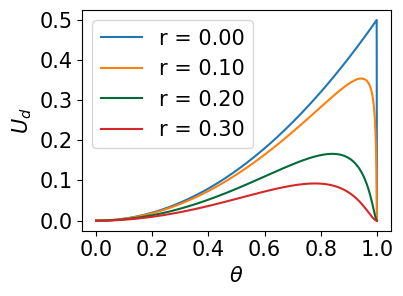

In [45]:
df = maximize_decision_benefit()

In [ ]:
plt.figure()
plt.plot(df['r'], df['max_eps'])
plt.xlabel('r')
plt.ylabel('epsilon with maximum decision benefit')
plt.savefig('optimum epsilon of the decision maker.png')

### Forgetting

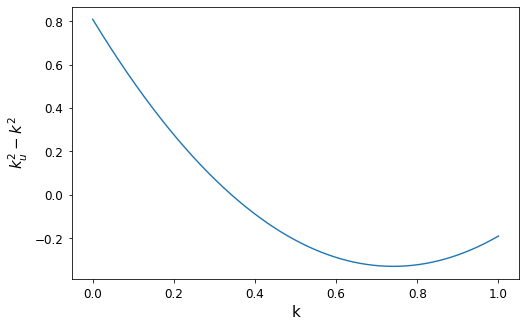

In [3]:
x0 = 0.9
func = lambda x: (2*x0**2+2*x0**3-1)*x**2-(2*x0**2+2*x0**3)*x+x0**2
x = np.linspace(0,1,1000)
y = func(x)
plt.style.use('seaborn-paper')
plt.figure(figsize = (8,5))
plt.plot(x,y)
plt.xlabel('k',size=15)
plt.ylabel(r'$k_u^2 - k^2$',size = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('ku.png')

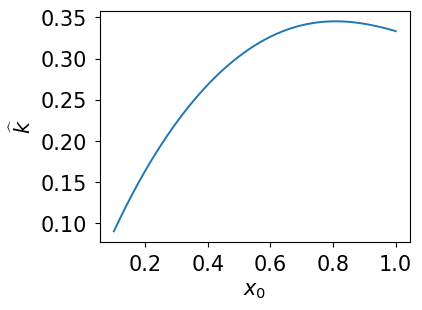

In [22]:
func = lambda x0: x0*(x0**2+x0-(x0**4-x0**2+1)**0.5)/(2*x0**2+2*x0**3-1)
x = np.linspace(0.1,1,1000)
y = func(x)
plt.style.use('seaborn-paper')
plt.figure(figsize = (4,3))
plt.plot(x,y)
plt.xlabel('$x_0$',size = 15)
plt.ylabel('$\widehat{k}$', size = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('khat.eps',bbox_inches='tight')